## **Loading required Libraries**

In [50]:
!pip install optuna

     |████████████████████████████████| 308 kB 8.9 MB/s 
     |████████████████████████████████| 80 kB 8.8 MB/s 
     |████████████████████████████████| 210 kB 53.4 MB/s 
     |████████████████████████████████| 75 kB 4.6 MB/s 
     |████████████████████████████████| 113 kB 50.7 MB/s 
     |████████████████████████████████| 149 kB 48.0 MB/s 
     |████████████████████████████████| 49 kB 6.2 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=d04e6838e07b1837318d2e1baf7fd6d45e6349f6e781d9ae2cb0fe892babdeeb
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [3]:
!wget https://github.com/snikhil17/Road_Safety/raw/main/Data/Tweets%2041k.zip

--2022-02-08 11:58:16--  https://github.com/snikhil17/Road_Safety/raw/main/Data/Tweets%2041k.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/snikhil17/Road_Safety/main/Data/Tweets%2041k.zip [following]
--2022-02-08 11:58:16--  https://raw.githubusercontent.com/snikhil17/Road_Safety/main/Data/Tweets%2041k.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6923891 (6.6M) [application/zip]
Saving to: ‘Tweets 41k.zip’

Tweets 41k.zip      100%[===================>]   6.60M  --.-KB/s    in 0.05s   

2022-02-08 11:58:17 (121 MB/s) - ‘Tweets 41k.zip’ saved [6923891/6923891]



In [4]:
!unzip "Tweets 41k.zip"


Archive:  Tweets 41k.zip
  inflating: Tweets 41k/road_accidents_india_40k_0_200.csv  
  inflating: Tweets 41k/road_accidents_india_40k_1000_to_1200.csv  
  inflating: Tweets 41k/road_accidents_india_40k_10000_to_11000.csv  
  inflating: Tweets 41k/road_accidents_india_40k_11000_to_12000.csv  
  inflating: Tweets 41k/road_accidents_india_40k_1200_to_1600.csv  
  inflating: Tweets 41k/road_accidents_india_40k_12000_to_13000.csv  
  inflating: Tweets 41k/road_accidents_india_40k_13000_to_14000.csv  
  inflating: Tweets 41k/road_accidents_india_40k_14000_to_15000.csv  
  inflating: Tweets 41k/road_accidents_india_40k_15000_to_16000.csv  
  inflating: Tweets 41k/road_accidents_india_40k_1600_to_1800.csv  
  inflating: Tweets 41k/road_accidents_india_40k_16000_to_16400.csv  
  inflating: Tweets 41k/road_accidents_india_40k_16400_to_18000.csv  
  inflating: Tweets 41k/road_accidents_india_40k_1800_to_2000.csv  
  inflating: Tweets 41k/road_accidents_india_40k_18000_to_21000.csv  
  inflating:

In [5]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import re

from nltk.corpus import wordnet
import string
from nltk.stem import WordNetLemmatizer, PorterStemmer



from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy



from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, StratifiedKFold


nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import glob
import os
import pandas as pd
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('/content/Tweets 41k/', "road_accidents_india_40k_*.csv"))), ignore_index= True).drop('Unnamed: 0', axis = 1)
df.head()

,tweet_content,labels_zero_shot,respective_scores,best_labels_scores,best_labels,sentiments_one_shot_classifier_score,sentiments_one_shot_classifier,cleaned_text,sentiment_via_VADER
0,The Dera followers across India have taken the...,"['positive information', 'negative information...","[0.6932814717292786, 0.13189217448234558, 0.09...","{'positive information': 0.6932814717292786, '...","['positive information', 'negative information']",{'positive': 0.8888261914253235},positive,follower take initiative prevent road accident...,negative
1,Saint Dr. @Gurmeetramrahim ji🌸\n#RoadSafetyIni...,"['positive information', 'negative information...","[0.6274787783622742, 0.15558470785617828, 0.14...","{'positive information': 0.6274787783622742, '...","['positive information', 'negative information']",{'positive': 0.6677867770195007},positive,follower take initiative prevent road accident...,negative
2,The Dera followers across India have taken the...,"['positive information', 'negative information...","[0.6528342366218567, 0.16880010068416595, 0.11...","{'positive information': 0.6528342366218567, '...","['positive information', 'negative information']",{'positive': 0.844313383102417},positive,follower take initiative prevent road accident...,negative
3,#RoadSafetyInitiativeByDSS\nThe Dera followers...,"['positive information', 'appreciation', 'nega...","[0.7812352180480957, 0.07765661180019379, 0.07...","{'positive information': 0.7812352180480957, '...","['positive information', 'appreciation']",{'positive': 0.8634591698646545},positive,dera follower take initiative prevent road acc...,negative
4,The Dera followers across India have taken the...,"['positive information', 'appreciation', 'nega...","[0.6620956063270569, 0.14676465094089508, 0.11...","{'positive information': 0.6620956063270569, '...","['positive information', 'appreciation']",{'positive': 0.8870344161987305},positive,follower take initiative prevent road accident...,negative


In [7]:
df.dropna(inplace = True)

In [8]:
df.shape

(37412, 9)

In [9]:
import ast
scores_ = []
for i in range(df.shape[0]):
  score = list(ast.literal_eval(df.iloc[i]['best_labels_scores']).values())
  scores_.append(score)

len(scores_)

37412

In [10]:
df['best_scores']  = scores_

In [11]:
df.iloc[37407]['tweet_content']

'now its just gettin on my nerves! Ppl r standin on the footboards! Wonder why india has many road accidents, well answer 1'

In [12]:
df[['tweet_content',	'best_labels', 'best_scores']].reset_index(drop = True)

,tweet_content,best_labels,best_scores
0,The Dera followers across India have taken the...,"['positive information', 'negative information']","[0.6932814717292786, 0.13189217448234558]"
1,Saint Dr. @Gurmeetramrahim ji🌸\n#RoadSafetyIni...,"['positive information', 'negative information']","[0.6274787783622742, 0.15558470785617828]"
2,The Dera followers across India have taken the...,"['positive information', 'negative information']","[0.6528342366218567, 0.16880010068416595]"
3,#RoadSafetyInitiativeByDSS\nThe Dera followers...,"['positive information', 'appreciation']","[0.7812352180480957, 0.07765661180019379]"
4,The Dera followers across India have taken the...,"['positive information', 'appreciation']","[0.6620956063270569, 0.14676465094089508]"
...,...,...,...
37407,now its just gettin on my nerves! Ppl r standi...,"['complaints', 'negative information']","[0.6474745869636536, 0.3313472867012024]"
37408,#thaindian: Second highest number of road acci...,"['negative information', 'fatal accident']","[0.6264201402664185, 0.304487407207489]"
37409,www.newestdiscovery.com update: India tiger di...,"['fatal accident', 'negative information']","[0.7110347151756287, 0.1832621693611145]"
37410,Dawn Thirty one killed in eastern India road a...,"['negative information', 'fatal accident']","[0.4900580048561096, 0.4652746915817261]"


In [13]:
label_ = []
for i in range(df.shape[0]):
  label = ast.literal_eval(df.best_labels.iloc[i])[0]
  label_.append(label)

df['label'] = label_

In [14]:
scores_ = []
for i in range(df.shape[0]):
  score = df.best_scores.iloc[i][0]
  scores_.append(score)

df['score'] = scores_

In [15]:
df.to_csv('df_final.csv')

In [16]:
df = pd.read_csv('df_final.csv')

In [17]:
df.label.unique()

array(['positive information', 'negative information', 'complaints',
       'fatal accident', 'appreciation'], dtype=object)

In [18]:
df[df.label=="negative information"].shape

(19832, 13)

In [19]:
df.head()

,Unnamed: 0,tweet_content,labels_zero_shot,respective_scores,best_labels_scores,best_labels,sentiments_one_shot_classifier_score,sentiments_one_shot_classifier,cleaned_text,sentiment_via_VADER,best_scores,label,score
0,0,The Dera followers across India have taken the...,"['positive information', 'negative information...","[0.6932814717292786, 0.13189217448234558, 0.09...","{'positive information': 0.6932814717292786, '...","['positive information', 'negative information']",{'positive': 0.8888261914253235},positive,follower take initiative prevent road accident...,negative,"[0.6932814717292786, 0.13189217448234558]",positive information,0.693281
1,1,Saint Dr. @Gurmeetramrahim ji🌸\n#RoadSafetyIni...,"['positive information', 'negative information...","[0.6274787783622742, 0.15558470785617828, 0.14...","{'positive information': 0.6274787783622742, '...","['positive information', 'negative information']",{'positive': 0.6677867770195007},positive,follower take initiative prevent road accident...,negative,"[0.6274787783622742, 0.15558470785617828]",positive information,0.627479
2,2,The Dera followers across India have taken the...,"['positive information', 'negative information...","[0.6528342366218567, 0.16880010068416595, 0.11...","{'positive information': 0.6528342366218567, '...","['positive information', 'negative information']",{'positive': 0.844313383102417},positive,follower take initiative prevent road accident...,negative,"[0.6528342366218567, 0.16880010068416595]",positive information,0.652834
3,3,#RoadSafetyInitiativeByDSS\nThe Dera followers...,"['positive information', 'appreciation', 'nega...","[0.7812352180480957, 0.07765661180019379, 0.07...","{'positive information': 0.7812352180480957, '...","['positive information', 'appreciation']",{'positive': 0.8634591698646545},positive,dera follower take initiative prevent road acc...,negative,"[0.7812352180480957, 0.07765661180019379]",positive information,0.781235
4,4,The Dera followers across India have taken the...,"['positive information', 'appreciation', 'nega...","[0.6620956063270569, 0.14676465094089508, 0.11...","{'positive information': 0.6620956063270569, '...","['positive information', 'appreciation']",{'positive': 0.8870344161987305},positive,follower take initiative prevent road accident...,negative,"[0.6620956063270569, 0.14676465094089508]",positive information,0.662096


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


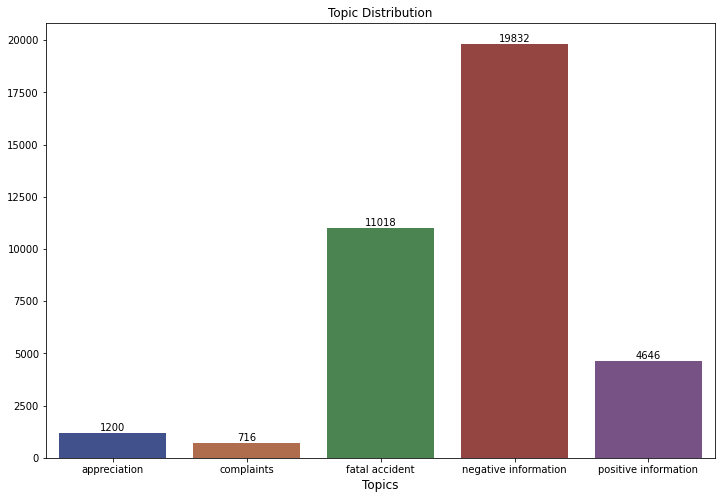

In [ ]:
#Get the distribution of the ratings
import seaborn as sns

x=df['label'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize = (12,8))
ax= sns.barplot(x.index, x.values, alpha=0.8, palette = 'dark')
plt.title("Topic Distribution")
# plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Topics', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show();

In [20]:
import re
import unicodedata

stop_words=stopwords.words('english') + ['&amp','&amp;']



"""Functions to clean text using Regex"""
ip_addr_regex = re.compile(r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b')
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
def regex_cleaning(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"[^a-zA-Z0-9]+", " ", phrase)
    phrase = re.sub('[\(\[].*?[\)\]]', ' ', phrase)
    phrase = unicodedata.normalize('NFKD', phrase).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    phrase = re.sub(r"\r\n", "", phrase)            # Removing additional line
    phrase = re.sub(r"\n", "", phrase)              # Removing additional line 
    phrase = re.sub(r"\S*@\S*\s?", "", phrase)      # Removing email-addresses 
    phrase = re.sub(r'http\S+', '', phrase)         # Removing website links
    phrase = re.sub(ip_addr_regex, "", phrase)      # Removing IP address link.
    phrase = emoji_pattern.sub(r'', phrase)         # Removing Emojis
    
    # phrase_final = " ".join([word.lower() for word in phrase.split() if word not in stop_words and len(word) > 3])
    phrase_final = [word.lower() for word in phrase.split() if word not in stop_words and len(word) > 3]
    return "" if len(phrase_final) < 3 else " ".join(phrase_final)  


import gensim

# def gen_words(text):
#     final = []
#     # for text in texts:
#     new = gensim.utils.simple_preprocess(text, deacc=True)
#     for word in new:
#       if len(word) > 3:
#         final.append(word)
#     # print(final)
#     return (" ".join(final))



# def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
#   nlp = spacy.load("en_core_web_sm")


#   doc = nlp(texts)
#   new_text = []
#   for token in doc:
#     if token.pos_ in allowed_postags:
#       # final = " ".join(new_text)
#       new_text.append(token.lemma_)
  
#   return (" ".join(new_text))
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

# **Data Selections**

In [21]:
df.label = df.label.replace('negative information', 'complaints').replace('positive information', 'appreciation').replace('fatal accident', 'accident')
negative_df = df[(df['label'] == 'complaints') & (df.score > 0.7)][['tweet_content', 'label', 'score']]
accident_df = df[(df['label'] == 'accident') & (df.score > 0.6)][['tweet_content', 'label', 'score']]
positive_df = df[(df['label'] == 'appreciation')][['tweet_content', 'label', 'score']]
negative_df.shape, accident_df.shape, positive_df.shape

((8389, 3), (7884, 3), (5846, 3))

In [22]:
final_df  = pd.concat([negative_df, positive_df, accident_df], ignore_index=True, sort=False)
final_df = final_df[final_df.tweet_content.map(lambda x: x.isascii())] #removing non-english rows
final_df.shape

(18539, 3)

In [23]:
freq_dict ={}
text_list = [text for text in final_df['tweet_content']]
for sentence in text_list:
  for word in str(sentence).split(): 
    
    if word in freq_dict.keys() and len(word) > 3 and word not in stopwords.words('english'):
      freq_dict[word.lower()] += 1

    if word not in freq_dict.keys() and len(word) > 3 and word not in stopwords.words('english'):
      freq_dict[word.lower()] = 1


count_df = pd.DataFrame( freq_dict.values(), freq_dict.keys()).reset_index().rename({0: "Frequency", "index": "Words"}, axis =1)
count_df.sort_values(by = 'Frequency', ascending = False)[:10]

,Words,Frequency
56,&amp;,1421
207,killed,720
308,@narendramodi,439
15,reflectors,369
12,tying,345
19,animals.,288
321,caused,279
7854,horns/necks,248
13,radium,206
5228,accident:,205


In [24]:
final_df['clean_corpus'] = final_df['tweet_content'].apply(regex_cleaning) #cleaning through regex

In [25]:
final_df = final_df[~(final_df['clean_corpus'] == '')] # Selecting rows which doesnt have empty values

In [26]:
story = []
for doc in final_df['clean_corpus']:
    raw_sent = sent_tokenize(doc)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))

# Word2Vec model
model_gensim = gensim.models.Word2Vec( 
    window=10,
    min_count=2
)

In [27]:
model_gensim.build_vocab(story) #building vocabulary

In [28]:
model_gensim.train(story, total_examples=model_gensim.corpus_count, epochs=model_gensim.epochs) # training the model

(957229, 1405935)

In [29]:
len(model_gensim.wv.index2word) # number of words in vocab

10756

In [30]:
# remove out-of-vocabulary word
def document_vector(doc):
    doc = [word for word in doc.split() if word in model_gensim.wv.index2word]
    return np.mean(model_gensim.wv[doc], axis=0)

In [31]:
final_df.shape 

(18515, 4)

In [32]:
"""In case some rows still have non-english words: e.g. words left from hashtags"""
remove_rows = [10922]
# final_df.iloc[10922]
for rows in remove_rows:
  final_df.drop(final_df.iloc[rows].name, inplace = True)

In [33]:
document_vector(final_df['clean_corpus'].values[65])

array([-0.6362046 ,  0.03838497, -0.26371565,  0.23302005, -0.85238516,
        0.77610016, -0.5493654 ,  0.40624052, -0.1580896 , -0.4901084 ,
       -0.3273979 , -0.48704514,  0.6454286 , -0.11755516,  0.18298562,
       -0.48281598, -0.43052873,  0.2543208 , -0.21328846,  0.3090805 ,
       -0.10214788, -0.15684697,  0.00720023, -0.19067132,  0.21217313,
       -0.4343221 ,  0.41230318,  0.1483024 ,  0.4963882 , -0.37488183,
        0.30136654, -0.00171599,  0.30118433,  0.02528669,  0.5004216 ,
        0.15887134,  0.12355552, -0.6608208 ,  0.1204779 , -0.7094614 ,
        1.2338936 , -0.40285805,  0.47487307, -0.13723364, -0.0646386 ,
       -0.1766134 ,  0.6048441 , -0.03320064, -0.00529787,  0.2654773 ,
        0.5863606 ,  0.11799149,  0.03580938, -0.6893941 ,  0.02926108,
        0.13704275, -0.22700468,  0.17905243,  0.26356068,  0.22325434,
        0.06882661,  0.16740103,  0.26425305, -0.02811571,  0.01719855,
        0.19967733,  0.3045549 ,  0.1472523 ,  0.10652192,  0.46

In [34]:
from tqdm import tqdm

In [35]:
"""Applying Word2Vec on whole data"""
X = []
for doc in tqdm(final_df['clean_corpus'].values):
    X.append(document_vector(doc))

# X = np.array(X)

100%|██████████| 18514/18514 [00:29<00:00, 637.40it/s] 


In [36]:
"""Converting the list to array"""
X = np.array(X)
X[0]

array([-0.03428847,  1.024388  ,  0.16794524,  0.5957152 , -1.2872887 ,
        1.7121269 , -1.4198289 ,  0.08767035, -0.3297567 , -0.6707794 ,
       -1.1651106 ,  0.36724272,  0.12783916, -0.99396247, -0.30995408,
       -1.4247141 , -1.208958  ,  0.19690177, -0.72898716, -0.7119701 ,
        0.6801718 , -0.6178304 ,  0.88383734, -1.3144163 ,  0.22043411,
       -1.4783585 , -1.4135733 , -0.30150783, -0.1386294 , -0.4022793 ,
        0.8071914 , -0.6680154 ,  0.12461966, -0.03838794,  1.2762374 ,
       -0.37576127, -1.2288694 , -0.47132608, -0.09315123, -0.8424872 ,
        1.7695417 , -0.34223083,  1.2836822 ,  0.230482  , -0.19311966,
        0.10113182,  1.0957463 , -0.35885853, -0.7788668 ,  1.2205887 ,
       -0.01245501, -0.10139952,  0.30831346, -1.54914   ,  0.2210652 ,
       -0.27992034, -1.7512043 ,  0.7871657 ,  0.32260153,  0.27966017,
       -0.7288472 ,  0.49440882,  0.44781378,  0.9486015 , -0.21397698,
       -0.22821216,  1.3029402 , -0.14323705,  0.9722874 ,  0.28

In [37]:
final_df.label.value_counts()

complaints      6834
accident        6776
appreciation    4904
Name: label, dtype: int64

In [38]:
"""Decalring Features and Label"""
features = X.copy()
labels = final_df['label'].values

In [39]:
# # Splitting the data into Training and Testing set
X_train, X_test, y_train, y_test = train_test_split(features, labels, stratify = labels,   test_size= 0.3,  random_state = 42)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [41]:
svc = SVC( kernel="linear", class_weight='balanced' )
knc = KNeighborsClassifier()
# mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier( random_state=7)
abc = AdaBoostClassifier( random_state=7)
bc = BaggingClassifier(random_state=7)
etc = ExtraTreesClassifier(random_state=7)
gbdt = GradientBoostingClassifier(random_state=7)
xgb = XGBClassifier(random_state=7)

In [42]:
clfs = {'SVC':svc,
    'KN' : knc, 
    # 'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [43]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    accuracy_train = metrics.accuracy_score(y_train,train_pred )
    accuracy_test = metrics.accuracy_score(y_test,test_pred)
    precision_train = metrics.precision_score(y_train,train_pred, average="macro")
    precision_test = metrics.precision_score(y_test,test_pred, average="macro")
    recall_train = metrics.recall_score(y_train,train_pred, average="macro")
    recall_test = metrics.recall_score(y_test,test_pred, average="macro")
    
    return accuracy_train,accuracy_test, precision_train, precision_test, recall_train, recall_test

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:

accuracy_scores_tr = []
accuracy_scores_ts = []
precision_tr_scores = []
precision_ts_scores = []
recall_tr_scores = []
recall_ts_scores = []

for name,clf in clfs.items():
    
    current_accuracy_tr,current_accuracy_ts,precision_tr, precision_ts, recall_tr, recall_ts = train_classifier(clf, X_train,
                                                                                                      y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy Train - ",current_accuracy_tr)
    print("Accuracy Test - ",current_accuracy_ts)
    print("Precision Train - \n",precision_tr)
    print("Precision Test - \n",precision_ts)
    print("Recall Train - \n",recall_tr)
    print("Recall Test - \n",recall_ts)
    
    accuracy_scores_tr.append(current_accuracy_tr)
    accuracy_scores_ts.append(current_accuracy_ts)
    precision_tr_scores.append(precision_tr)
    precision_ts_scores.append(precision_ts)
    recall_tr_scores.append(recall_tr)
    recall_ts_scores.append(recall_ts)
    print()
    print("="*100)
    print()

For  SVC
Accuracy Train -  0.7607068446639401
Accuracy Test -  0.763996399639964
Precision Train - 
 0.756495893921599
Precision Test - 
 0.7575917052218655
Recall Train - 
 0.7495115321979974
Recall Test - 
 0.7529525908676931


For  KN
Accuracy Train -  0.8446639401188363
Accuracy Test -  0.7704770477047704
Precision Train - 
 0.8401680528579902
Precision Test - 
 0.7619881921181543
Recall Train - 
 0.8355503903959768
Recall Test - 
 0.7602462705551698


For  DT
Accuracy Train -  0.9991511690716877
Accuracy Test -  0.7533753375337534
Precision Train - 
 0.999094801688663
Precision Test - 
 0.7456557180834164
Recall Train - 
 0.9991505917020053
Recall Test - 
 0.7455562393473341


For  LR
Accuracy Train -  0.7647194999614167
Accuracy Test -  0.7706570657065707
Precision Train - 
 0.7661585323293344
Precision Test - 
 0.7692148635724759
Recall Train - 
 0.7468308776786348
Recall Test - 
 0.7522309037125461


For  RF
Accuracy Train -  0.9991511690716877
Accuracy Test -  0.81098109810981

In [47]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy Train':accuracy_scores_tr,'Accuracy Test':accuracy_scores_ts,
                               'Precision Train':precision_tr_scores,'Precision Test':precision_ts_scores,
                               'Recall Train':recall_tr_scores,'Recall Test':recall_ts_scores}).style.background_gradient(cmap = 'magma_r', subset = ['Recall Test', 'Precision Test', 'Accuracy Test'	])
performance_df

,Algorithm,Accuracy Train,Accuracy Test,Precision Train,Precision Test,Recall Train,Recall Test
0,SVC,0.760707,0.763996,0.756496,0.757592,0.749512,0.752953
1,KN,0.844664,0.770477,0.840168,0.761988,0.835550,0.760246
2,DT,0.999151,0.753375,0.999095,0.745656,0.999151,0.745556
3,LR,0.764719,0.770657,0.766159,0.769215,0.746831,0.752231
4,RF,0.999151,0.810981,0.999123,0.809940,0.999123,0.797502
5,AdaBoost,0.730303,0.730693,0.726674,0.725325,0.711960,0.712013
6,BgC,0.992669,0.782898,0.992278,0.774116,0.992660,0.775519
7,ETC,0.999151,0.810801,0.999095,0.809931,0.999151,0.797530
8,GBDT,0.823366,0.780558,0.835146,0.786085,0.805755,0.761004
9,xgb,0.799599,0.777678,0.815784,0.788668,0.777880,0.755134


In [48]:
%%time
# from sklearn.ensemble import RandomForestClassifier
lr = SVC(kernel="linear", class_weight='balanced' )
lr.fit(X_train,y_train)

preds_train = lr.predict(X_train)                                            # Prediction on training set
preds_test = lr.predict(X_test)                                              # Prediction on training set

training_metrics = metrics.classification_report(y_train, preds_train)                    # Getting Classification report of Training set predictions
testing_metrics = metrics.classification_report(y_test, preds_test)                       # Getting Classification report of Test set predictions

print(f"Training Confusion Matrix: \n{metrics.confusion_matrix(y_train, preds_train)}\n") # Printing Confusion Matrix (training)
print(f"Training Classification Report: \n{training_metrics}")                            # Printing Classification report (testing)
print("="*100)
print(f"Testing Confusion Matrix: \n{metrics.confusion_matrix(y_test, preds_test)}\n")    # Printing Confusion Matrix (training)
print(f"Testing Classification Report: \n{testing_metrics}")                              # Printing Classification report (testing)

Training Confusion Matrix: 
[[4121  104  518]
 [ 122 2192 1119]
 [ 335  903 3545]]

Training Classification Report: 
              precision    recall  f1-score   support

    accident       0.90      0.87      0.88      4743
appreciation       0.69      0.64      0.66      3433
  complaints       0.68      0.74      0.71      4783

    accuracy                           0.76     12959
   macro avg       0.76      0.75      0.75     12959
weighted avg       0.76      0.76      0.76     12959

Testing Confusion Matrix: 
[[1798   39  196]
 [  50  946  475]
 [ 131  420 1500]]

Testing Classification Report: 
              precision    recall  f1-score   support

    accident       0.91      0.88      0.90      2033
appreciation       0.67      0.64      0.66      1471
  complaints       0.69      0.73      0.71      2051

    accuracy                           0.76      5555
   macro avg       0.76      0.75      0.75      5555
weighted avg       0.77      0.76      0.76      5555

CPU ti

<Figure size 1080x1080 with 0 Axes>

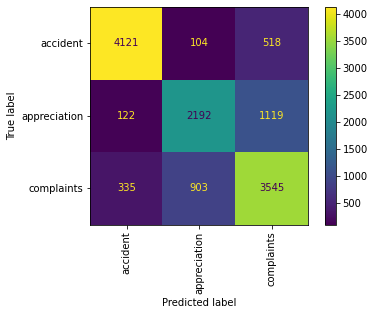

In [49]:
plt.figure(figsize = (15,15))
metrics.plot_confusion_matrix(lr,X_train,y_train, )  
plt.xticks(rotation = 90)
plt.show()


## **Hyper-parameter tuning**



In [51]:
import optuna
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn import preprocessing


def train_classifier(clf,X_train,y_train,X_test,y_test):
    # clf.fit(X_train,y_train)
    train_preds = clf.predict_proba(X_train)[:,1]
    test_preds = clf.predict_proba(X_test)[:,1]
    
    pr_test,re_test,_ = precision_recall_curve(y_test,test_preds)

    auc_test = auc(re_test, pr_test)
    return re_test, pr_test, auc_test


def run(trial):
  xtrain =  X_train.copy()
  xvalid = X_test.copy()


  ytrain = y_train.copy()
  yvalid = y_test.copy()

  # xtrain = xtrain[useful_features]
  # xvalid = xvalid[useful_features]
  
  # qc=preprocessing.LabelEncoder()
  # ytrain = qc.fit_transform(ytrain)
  # yvalid = qc.transform(yvalid)
  
  
  params = {
  'C': trial.suggest_float("C", 1e-2, 5, log=True),
  # 'reg_lambda' : trial.suggest_loguniform("reg_lambda", 1e-8, 100.0),
  # 'reg_alpha' : trial.suggest_loguniform("reg_alpha", 1e-8, 100.0),
  # 'subsample' : trial.suggest_float("subsample", 0.1, 1.0),
  # 'colsample_bytree' : trial.suggest_float("colsample_bytree", 0.1, 1.0),
      'class_weight' : trial.suggest_categorical("class_weight", ['balanced', None])
  }
  
  model = SVC(**params,
#         tree_method="gpu_hist",
#         gpu_id=1,
#         predictor="gpu_predictor",
  )
  
  
  model.fit(xtrain, ytrain)
  # re_test, pr_test, auc_test = train_classifier(model,xtrain,ytrain,xvalid,yvalid)
  preds_train=model.predict(xtrain)
  preds_valid=model.predict(xvalid)
    
    # final_test_preds.append(preds_test)
    # final_valid_preds.update(dict(zip(valid_id,preds_valid)))
  
  f1_score= metrics.f1_score(yvalid,preds_valid, average = 'macro')
  #Score 
  # scores.append(roc1)
  print(f"f1_score:{f1_score}")

  # print(auc_test)
  return f1_score


study = optuna.create_study(direction="maximize")
study.optimize(run, n_trials=20)

study.best_params

[I 2022-02-08 12:23:16,809] A new study created in memory with name: no-name-4e9bfd4b-8ce3-43be-ba0e-6e21972d6027
[I 2022-02-08 12:23:44,953] Trial 0 finished with value: 0.7393821823613317 and parameters: {'C': 2.1533402150895062, 'class_weight': None}. Best is trial 0 with value: 0.7393821823613317.


f1_score:0.7393821823613317


[I 2022-02-08 12:24:15,396] Trial 1 finished with value: 0.7567550979848857 and parameters: {'C': 2.3382732507683284, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.7567550979848857.


f1_score:0.7567550979848857


[I 2022-02-08 12:24:47,239] Trial 2 finished with value: 0.7451875176970671 and parameters: {'C': 0.7679756467327976, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.7567550979848857.


f1_score:0.7451875176970671


[I 2022-02-08 12:25:17,483] Trial 3 finished with value: 0.6929175344146717 and parameters: {'C': 0.272895452884832, 'class_weight': None}. Best is trial 1 with value: 0.7567550979848857.


f1_score:0.6929175344146717


[I 2022-02-08 12:25:51,667] Trial 4 finished with value: 0.72272021070098 and parameters: {'C': 0.10239339004509426, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.7567550979848857.


f1_score:0.72272021070098


[I 2022-02-08 12:26:23,446] Trial 5 finished with value: 0.6768376614900505 and parameters: {'C': 0.14859534080073167, 'class_weight': None}. Best is trial 1 with value: 0.7567550979848857.


f1_score:0.6768376614900505


[I 2022-02-08 12:27:05,696] Trial 6 finished with value: 0.6396655571316675 and parameters: {'C': 0.04211686875660154, 'class_weight': None}. Best is trial 1 with value: 0.7567550979848857.


f1_score:0.6396655571316675


[I 2022-02-08 12:27:38,950] Trial 7 finished with value: 0.760429212438862 and parameters: {'C': 3.3746543157237645, 'class_weight': 'balanced'}. Best is trial 7 with value: 0.760429212438862.


f1_score:0.760429212438862


[I 2022-02-08 12:28:09,973] Trial 8 finished with value: 0.7454639091982688 and parameters: {'C': 0.6200857466019488, 'class_weight': 'balanced'}. Best is trial 7 with value: 0.760429212438862.


f1_score:0.7454639091982688


[I 2022-02-08 12:28:47,240] Trial 9 finished with value: 0.6960070374524739 and parameters: {'C': 0.051025629227635184, 'class_weight': 'balanced'}. Best is trial 7 with value: 0.760429212438862.


f1_score:0.6960070374524739


[I 2022-02-08 12:29:17,333] Trial 10 finished with value: 0.7522439540680224 and parameters: {'C': 4.473875506639135, 'class_weight': None}. Best is trial 7 with value: 0.760429212438862.


f1_score:0.7522439540680224


[I 2022-02-08 12:29:58,034] Trial 11 finished with value: 0.625188207293187 and parameters: {'C': 0.010389035709954019, 'class_weight': None}. Best is trial 7 with value: 0.760429212438862.


f1_score:0.625188207293187


[I 2022-02-08 12:30:25,412] Trial 12 finished with value: 0.750453858866726 and parameters: {'C': 4.3857137955481065, 'class_weight': None}. Best is trial 7 with value: 0.760429212438862.


f1_score:0.750453858866726


[I 2022-02-08 12:30:54,414] Trial 13 finished with value: 0.7294115595689851 and parameters: {'C': 1.2598853078360364, 'class_weight': None}. Best is trial 7 with value: 0.760429212438862.


f1_score:0.7294115595689851


[I 2022-02-08 12:31:22,672] Trial 14 finished with value: 0.7384107347107166 and parameters: {'C': 2.00480275638623, 'class_weight': None}. Best is trial 7 with value: 0.760429212438862.


f1_score:0.7384107347107166


[I 2022-02-08 12:31:52,916] Trial 15 finished with value: 0.7034787962967243 and parameters: {'C': 0.39745576386261744, 'class_weight': None}. Best is trial 7 with value: 0.760429212438862.


f1_score:0.7034787962967243


[I 2022-02-08 12:32:21,322] Trial 16 finished with value: 0.7386744215412763 and parameters: {'C': 2.0284215963571333, 'class_weight': None}. Best is trial 7 with value: 0.760429212438862.


f1_score:0.7386744215412763


[I 2022-02-08 12:32:48,754] Trial 17 finished with value: 0.752068726167788 and parameters: {'C': 4.522329557602137, 'class_weight': None}. Best is trial 7 with value: 0.760429212438862.


f1_score:0.752068726167788


[I 2022-02-08 12:33:17,566] Trial 18 finished with value: 0.7270969451360009 and parameters: {'C': 1.000698717476207, 'class_weight': None}. Best is trial 7 with value: 0.760429212438862.


f1_score:0.7270969451360009


[I 2022-02-08 12:33:47,743] Trial 19 finished with value: 0.7073428393350588 and parameters: {'C': 0.47366592581201356, 'class_weight': None}. Best is trial 7 with value: 0.760429212438862.


f1_score:0.7073428393350588


{'C': 3.3746543157237645, 'class_weight': 'balanced'}

### **Prediction using SVC(optimized)**

In [52]:
params = {'C': 3.3746543157237645, 'class_weight': 'balanced'}

model = SVC(**params,
#         tree_method="gpu_hist",
#         gpu_id=1,
#         predictor="gpu_predictor",
)
model.fit(X_train, y_train)
preds_train = model.predict(X_train)                                            # Prediction on training set
preds_test = model.predict(X_test)                                              # Prediction on training set

training_metrics = metrics.classification_report(y_train, preds_train)                    # Getting Classification report of Training set predictions
testing_metrics = metrics.classification_report(y_test, preds_test)                       # Getting Classification report of Test set predictions

print(f"Training Confusion Matrix: \n{metrics.confusion_matrix(y_train, preds_train)}\n") # Printing Confusion Matrix (training)
print(f"Training Classification Report: \n{training_metrics}")                            # Printing Classification report (testing)
print("="*100)
print(f"Testing Confusion Matrix: \n{metrics.confusion_matrix(y_test, preds_test)}\n")    # Printing Confusion Matrix (training)
print(f"Testing Classification Report: \n{testing_metrics}")                              # Printing Classification report (testing)

Training Confusion Matrix: 
[[4113  105  525]
 [ 143 2129 1161]
 [ 309  750 3724]]

Training Classification Report: 
              precision    recall  f1-score   support

    accident       0.90      0.87      0.88      4743
appreciation       0.71      0.62      0.66      3433
  complaints       0.69      0.78      0.73      4783

    accuracy                           0.77     12959
   macro avg       0.77      0.76      0.76     12959
weighted avg       0.77      0.77      0.77     12959

Testing Confusion Matrix: 
[[1794   35  204]
 [  53  913  505]
 [ 131  346 1574]]

Testing Classification Report: 
              precision    recall  f1-score   support

    accident       0.91      0.88      0.89      2033
appreciation       0.71      0.62      0.66      1471
  complaints       0.69      0.77      0.73      2051

    accuracy                           0.77      5555
   macro avg       0.77      0.76      0.76      5555
weighted avg       0.77      0.77      0.77      5555



## **Deployment and Saving of important functions and model**

#### **Model**

In [ ]:
params = {'C': 3.3746543157237645, 'class_weight': 'balanced'}

model = SVC(**params,
#         tree_method="gpu_hist",
#         gpu_id=1,
#         predictor="gpu_predictor",
)
model.fit(X_train, y_train)
preds_train = model.predict(X_train)                                            # Prediction on training set
preds_test = model.predict(X_test)                                              # Prediction on training set

training_metrics = metrics.classification_report(y_train, preds_train)                    # Getting Classification report of Training set predictions
testing_metrics = metrics.classification_report(y_test, preds_test)                       # Getting Classification report of Test set predictions

print(f"Training Confusion Matrix: \n{metrics.confusion_matrix(y_train, preds_train)}\n") # Printing Confusion Matrix (training)
print(f"Training Classification Report: \n{training_metrics}")                            # Printing Classification report (testing)
print("="*100)
print(f"Testing Confusion Matrix: \n{metrics.confusion_matrix(y_test, preds_test)}\n")    # Printing Confusion Matrix (training)
print(f"Testing Classification Report: \n{testing_metrics}")   

In [53]:
suff_  = round(metrics.f1_score(y_test, preds_test,average = 'weighted' ), 3)
import pickle
"""Save the Bagging CLF model"""
output_file = f'model_label_generator_SVC_{suff_}.pkl'

with open(output_file, 'wb') as f_out:
    pickle.dump(model, f_out)

### **Preprocessing functions**

In [ ]:
"""Functions to clean text using Regex"""
ip_addr_regex = re.compile(r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b')
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
def regex_cleaning(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"[^a-zA-Z0-9]+", " ", phrase)
    phrase = re.sub('[\(\[].*?[\)\]]', ' ', phrase)
    phrase = unicodedata.normalize('NFKD', phrase).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    phrase = re.sub(r"\r\n", "", phrase)            # Removing additional line
    phrase = re.sub(r"\n", "", phrase)              # Removing additional line 
    phrase = re.sub(r"\S*@\S*\s?", "", phrase)      # Removing email-addresses 
    phrase = re.sub(r'http\S+', '', phrase)         # Removing website links
    phrase = re.sub(ip_addr_regex, "", phrase)      # Removing IP address link.
    phrase = emoji_pattern.sub(r'', phrase)         # Removing Emojis
    
    # phrase_final = " ".join([word.lower() for word in phrase.split() if word not in stop_words and len(word) > 3])
    phrase_final = [word.lower() for word in phrase.split() if word not in stop_words and len(word) > 3]
    return "" if len(phrase_final) < 3 else " ".join(phrase_final)  

def word_2_vec_train(df_corpus):
  story = []
  clean_corpus = df_corpus.apply(regex_cleaning)
  for doc in clean_corpus:
      raw_sent = sent_tokenize(doc)
      for sent in raw_sent:
          story.append(simple_preprocess(sent))
  model_gensim = gensim.models.Word2Vec( 
      window=10,
      min_count=2
  )
  model_gensim.build_vocab(story)
  model_gensim.train(story, total_examples=model_gensim.corpus_count, epochs=model_gensim.epochs)

  # """Applying Word2Vec on whole data"""
  # X = []
  # for doc in tqdm(final_df['clean_corpus'].values):
  #     X.append(document_vector(doc))

  # X = np.array(X)
  # remove out-of-vocabulary words
  doc = [word for word in doc.split() if word in model_gensim.wv.index2word]
  return model_gensim, np.mean(model_gensim.wv[doc], axis=0)

def word_2_vec_transform(doc, model_gensim):
  clean_doc = regex_cleaning(test_text)
  doc = [word for word in doc.split() if word in model_gensim.wv.index2word]
  return np.mean(model_gensim.wv[doc], axis=0)

In [54]:
# model_gensim, vec = word_2_vec_train(final_df.tweet_content)

output_file = f'model_gensim_label.pkl'

with open(output_file, 'wb') as f_out:
    pickle.dump(model_gensim, f_out)

In [ ]:
"""Try out"""
test_text = final_df.tweet_content.iloc[200]
clean_text = regex_cleaning(test_text)
model.predict(word_2_vec_transform(clean_text, model_gensim).reshape(1, -1))[0]

'complaints'

In [ ]:
!pip freeze > requirements.txt  